#### TensorFlow and tf.keras

In [1]:
import tensorflow as tf
from tensorflow import keras

#### Helper libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
print(tf.__version__)

1.10.0


##### Fashion MNIST 
* Drop-in replacement for the classic MNIST dataset
* 60K train + 10K test = 70K total
* 10 categories
* image 28x28 grayscale

In [9]:
fashion_mnist = keras.datasets.fashion_mnist

In [11]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

training set

In [15]:
train_images.shape

(60000, 28, 28)

In [20]:
len(train_labels)

60000

In [21]:
train_labels[10:20]

array([0, 9, 5, 5, 7, 9, 1, 0, 6, 4], dtype=uint8)

test set

In [24]:
test_images.shape

(10000, 28, 28)

In [26]:
len(test_labels)

10000

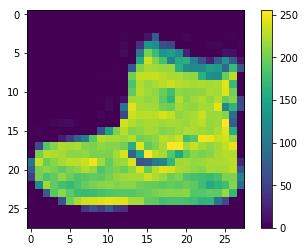

In [28]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [54]:
print(train_images[0,12:16,12:16])

[[0.00152249 0.0037524  0.00341407 0.00338331]
 [0.00084583 0.00362937 0.00350634 0.0035371 ]
 [0.00364475 0.00347559 0.00333718 0.00342945]
 [0.00350634 0.00318339 0.00327566 0.00339869]]


We scale these values to a range of 0 to 1 before feeding to the neural network model.

In [36]:
train_images = train_images / 255.0
test_images = test_images / 255.0

display

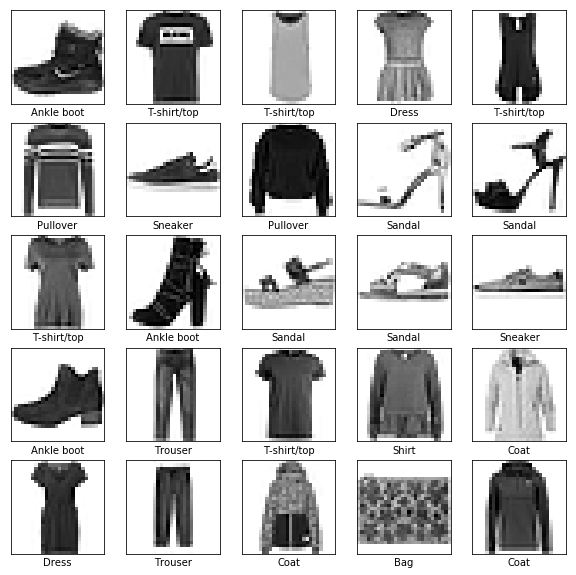

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

##### Build the Model
Building the neural network requires configuring the layers of the model, then compiling the model.

###### Setup the layers
* The basic building block of a neural network is the layer. 
* Layers extract representations from the data fed into them. 
* These representations are more meaningful for the problem at hand.

1. The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.
2. After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). 
3. The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [84]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

##### Compile the Model

* Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [86]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##### Train the model

1. Feed the training data to the model—in this example, the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

In [87]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 29us/step - loss: 1.0064 - acc: 0.6797
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.6036 - acc: 0.7830
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.5336 - acc: 0.8094
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.4953 - acc: 0.8242
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.4705 - acc: 0.8352


Evaluate accuracy

In [88]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 16us/step
Test accuracy: 0.8219


test dataset < training dataset. This gap between training accuracy and test accuracy is an example of overfitting. 
Overfitting is when a machine learning model performs worse on new data than on their training data.

##### Make predictions

In [60]:
predictions = model.predict(test_images)
predictions[0]

array([1.9031339e-06, 2.0696284e-08, 1.0501383e-05, 7.4380996e-06,
       1.4091765e-05, 1.8195224e-01, 2.4495230e-05, 4.0331545e-01,
       7.7518537e-03, 4.0692201e-01], dtype=float32)

In [61]:
np.argmax(predictions[0])

9

In [64]:
test_labels[0]

9

Let's plot several images with their predictions. Correct prediction labels are green and incorrect prediction labels are red.

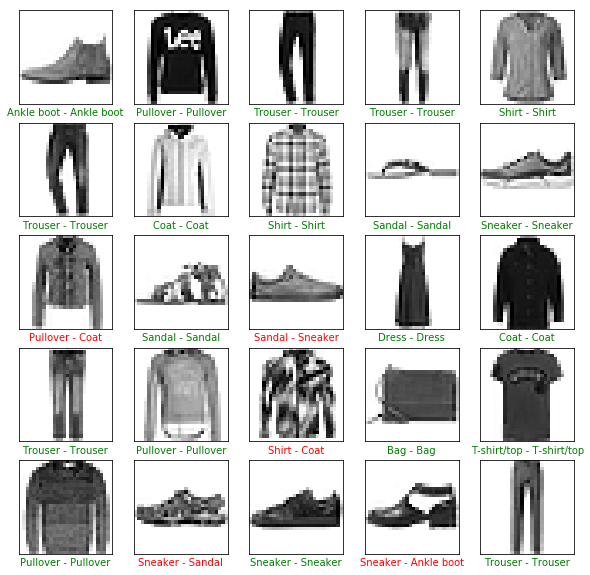

In [76]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} - {}".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)


Finally, use the trained model to make a prediction about a single image.

In [77]:
img = test_images[0]
print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
So even though we're using a single image, we need to add it to a list:

In [78]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [79]:
predictions = model.predict(img)
print(predictions)

[[1.9031304e-06 2.0696323e-08 1.0501372e-05 7.4380855e-06 1.4091765e-05
  1.8195203e-01 2.4495208e-05 4.0331563e-01 7.7518499e-03 4.0692201e-01]]


In [80]:
prediction = predictions[0]
np.argmax(prediction)

9